In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
class Physics:
    def __init__(self):
        self.l1 = 1
        self.l2 = 1
        self.m1 = 1
        self.m2 = 1
        self.g = 10

        self.level = 12
        self.N_t = np.power(2, 12)
        self.tList = np.linspace(0,100,self.N_t)
        self.h = self.tList[1] - self.tList[0]
        self.PsiList = np.zeros((4, self.N_t), dtype='float')
        self.Psi = np.array([np.pi/2,1,-np.pi/3,-1])
        self.PsiList[:,0] = self.Psi

    def F(self, t, Psi):
        th1 = Psi[0]
        th1D = Psi[1]
        th2 = Psi[2]
        th2D = Psi[3]
        A1 = self.l1 * (self.m1+self.m2)
        B1 = self.m2*self.l2*np.cos(th2 - th1)
        C1 = self.m2*self.l2*th2D**2 * np.sin(th2-th1)
        D1 = (self.m1+self.m2)*self.g*np.sin(th1)

        A2 = self.l2
        B2 = self.l1*np.cos(th2-th1)
        C2 = -self.l1*th1D**2 * np.sin(th2-th1)
        D2 = self.g*np.sin(th2)

        f0 = Psi[1]
        f1 = (A2*(C1-D1)-B1*(C2-D2))/(A1*A2 - B1*B2)
        f2 = Psi[3]
        f3 = (B2*(C1-D1)-A1*(C2-D2))/(B1*B2 - A1*A2)

        return np.array([f0,f1,f2,f3])


    def calculate(self):
        for i,t in enumerate(self.tList[:-1]):
            self.Psi = self.PsiList[:,i]

            f0 = self.F(t, self.Psi)
            f1 = self.F(t+self.h/2, self.Psi+f0*self.h/2)
            f2 = self.F(t+self.h/2, self.Psi+f1*self.h/2)
            f3 = self.F(t+self.h, self.Psi+f2*self.h)

            self.Psi += self.h/6 * (f0 + 2*f1 + 2*f2 + f3)

            self.PsiList[:,i+1] = self.Psi


    def Plotter(self):
        th1 = self.PsiList[0,:]
        th2 = self.PsiList[2,:]
        pos1 = np.array([self.l1*np.sin(th1), -self.l1*np.cos(th1)])
        print(pos1.shape)
        pos2 = pos1 + np.array([self.l2*np.sin(th2), -self.l2*np.cos(th2)])

        plt.plot(pos1[0,:], pos1[1,:])
        plt.plot(pos2[0,:], pos2[1,:], 'r', alpha=0.8)
            


    



In [108]:
phys = Physics()

In [109]:
phys.calculate()

(2, 4096)


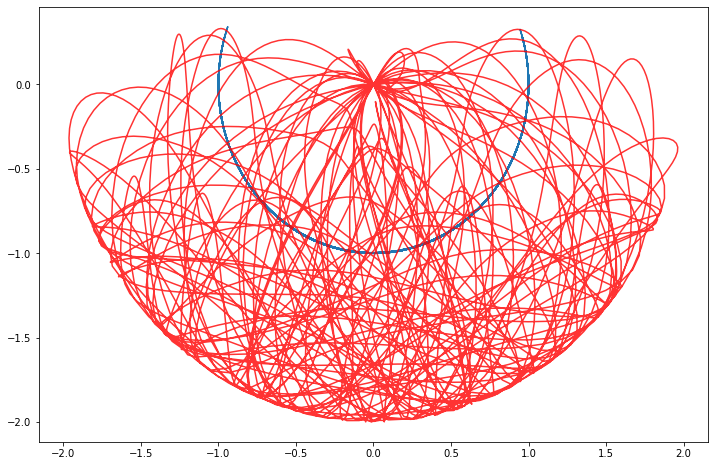

In [110]:
plt.figure(figsize=(12,8))
phys.Plotter()

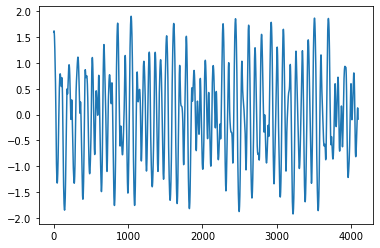

In [111]:
plt.plot(phys.PsiList[0,:])

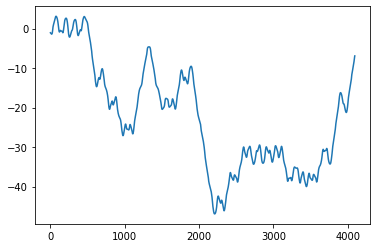

In [112]:
plt.plot(phys.PsiList[2,:])

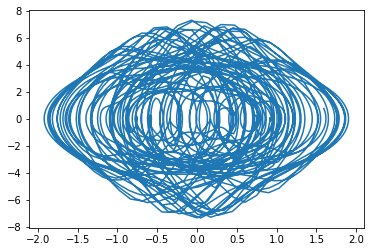

In [113]:
plt.plot(phys.PsiList[0,:], phys.PsiList[1,:])

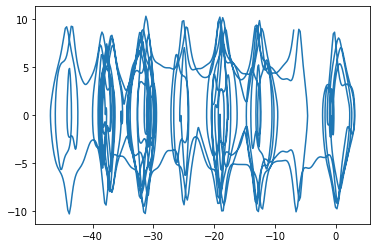

In [114]:
plt.plot(phys.PsiList[2,:], phys.PsiList[3,:])

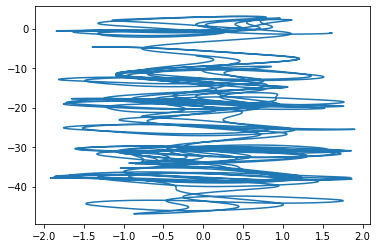

In [115]:
plt.plot(phys.PsiList[0,:], phys.PsiList[2,:])

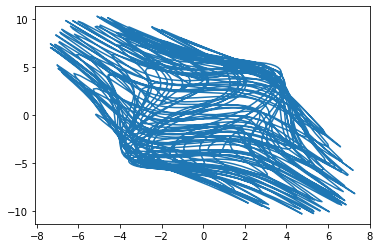

In [116]:
plt.plot(phys.PsiList[1,:], phys.PsiList[3,:])
